# Question 5 (20 pts) -- COMPLETE
Extensively describe the overfitting and underfitting problem. Use execution examples with decision tree and SVM (with or without kernel). Use the scikit implementations.

### Overfitting: 
The process of tailoring your model to fit excusilvely with your current training data. In this way all of your data points that you have in your training set are all classified correctly, however any new data points in the test set end up not being close to the mark as well as they could have been if given a more generic model to fit the data with. 

for example say we have points [cat, 0.32], [cat, 0.36 ], [dog, 0.51] and new points [dog, 0.53], [cat, 0.50]. With overfitting our new points would classify our new cat to a dog, due to our previous data fit. By having a model that classifies more generally, our error with future data will actually be minimized. View the following code for how this can happen with decision tree and svm :

In [14]:
# SVM Overfitting

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

svm_model = svm.SVC(kernel='linear', C=1)

svm_model.fit(X_train,y_train)

y_pred = svm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9

Since our testing dataset is so small it is not very smart to split the data. With a smaller dataset overfitting is more likely to occur. Overfitting in the case of SVM can be fixed by using cross validation. Cross validation allows us to train on all of our avalible data and is helpful for smaller datasets.

In [19]:
svm_model = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(svm_model, iris.data, iris.target, cv=5) # using 5 fold
scores.mean() 

0.9800000000000001

By using cross validation our data has more chances to learn and not be overfit. Therefore our accuracy score is higher than using testing and training data.

Decision tree overfitting can occur because as the tree gets larger with the amount of nodes it slowly / or rapidly, converges to 100% accuracy. This is because it begins to classify each instance individually until each instance is correctly classified. As the accuracy metric for a decision tree increases for the test set, its accuracracy for the training set slowly diminishes. This is caused from overfitting our test data

In [26]:
# decision tree overfitting sample 
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

[Text(111.60000000000001, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(55.800000000000004, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.7\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(111.60000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(55.800000000000004, 90.6, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(167.4, 90.6, 'X[1] <= 2.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 54.359999999999985, 'X[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(279.0, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 126.83999999999999, 'gini = 0.0\nsamples = 38\n

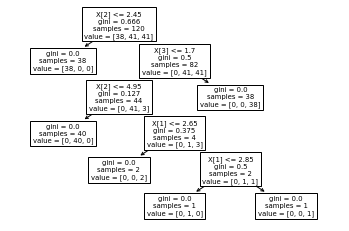

In [27]:
tree.plot_tree(clf) 

In [28]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9

In [31]:
# increase how many training data we are using 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=46)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

In [32]:
# notice the higher accuracy score lets go a little more dramatic 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=46)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.875

Here is the point of over fitting. Our accuracy on our training data went from 0.93 to 0.875 by cutting our testing size by half. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=46)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.6666666666666666

Our model is offically over fitted. To help this we could potentially use a smaller training set, or prune our trees.

### Underfitting

Underfitting is the opposite of overfitting where our training data accuracy score is extremly low. This is because our training model is unable to capture the relationship between the features in each instance to correctly get an idea of what they should be. The following code is examples of underfitting happening in decision tree and svm:

In [43]:
# svm underfitting 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


clf  = svm.SVC(kernel='linear', C=0.001)
clf.fit(X_train, y_train)
pred = clf.predict(X_train)

accuracy_score(y_train, pred)

0.9183673469387755

In SVM our C value is able to control how malubale our deciding line is. A higher value a stiffer line. By having our C value be super stiff we are not taking into account all of the variations of our data, thus we have a low accuracy score on our own training data that we should know about

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=46)

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5)
clf = clf.fit(X_train,y_train)
# finding our accuracy on the training data. 
pred = clf.predict(X_train)
accuracy_score(y_train, pred)

1.0

When we set the max depth of our tree to 5 each different situation is being able to be classifed in our training data. This is fine, but on testing data it overfits. alternativly, if we set our max depth smaller, prunining our tree:

In [61]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf = clf.fit(X_train,y_train)
# finding our accuracy on the training data. 
pred = clf.predict(X_train)
accuracy_score(y_train, pred)

0.9777777777777777

Our accuracy of our own training data decreases. If we change it to one depth it becomes around 0.66, underfitting our training data causes us to loose accuracy on our testing data as well.

In [62]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333